In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import csv
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from keras import models, layers, optimizers, regularizers
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from keras import regularizers
%matplotlib inline

### Import datasets
- We will import train, test1 and test2 dataset
- Merge test1 and train dataset, in order to expend our train dataset

In [2]:
raw_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
raw_test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
raw_test2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
raw_df = raw_df.append(raw_test_df)
raw_df.head(20)
raw_df.columns

Index(['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft',
       'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat',
       'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway',
       'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher',
       'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer',
       'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
       'has_childrens_playroom', 'rent', 'no_fee', 'description',
       'neighborhood', 'borough', 'unit', 'floornumber', 'line'],
      dtype='object')

## Data Explore

In [3]:
raw_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.400000e+04,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,1.399900e+04,1.400000e+04,14000.000000,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,12498.000000
mean,1.542772e+06,1.661643,1.238929,848.388643,10681.801286,40.727746,-73.956776,2.368400e+06,2.285087e+09,10.233350,...,0.268500,0.170714,0.262643,0.208214,0.072357,0.133786,0.089571,3591.997214,0.495786,6.198232
std,4.323673e+06,1.084151,0.550979,513.039489,592.728072,0.053635,0.042994,1.242507e+06,1.200828e+09,12.003629,...,0.443195,0.376273,0.440086,0.406045,0.259088,0.340434,0.285577,2874.099247,0.500000,7.728606
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.168405,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.231400e+04,1.000000,1.000000,604.000000,10023.000000,40.693256,-73.986095,1.052178e+06,1.011286e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.545810e+05,2.000000,1.000000,800.000000,11103.000000,40.729048,-73.961554,3.018885e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.267980e+05,2.000000,1.000000,1000.000000,11218.000000,40.764801,-73.936080,3.325600e+06,3.050558e+09,12.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877211e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.029930e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [4]:
raw_df.shape

(14000, 38)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 7236931 to 7463404
Data columns (total 38 columns):
addr_unit                 13890 non-null object
building_id               14000 non-null int64
bedrooms                  14000 non-null int64
bathrooms                 14000 non-null float64
size_sqft                 14000 non-null float64
created_at                14000 non-null object
addr_street               14000 non-null object
addr_city                 14000 non-null object
addr_zip                  14000 non-null int64
addr_lat                  14000 non-null float64
addr_lon                  14000 non-null float64
bin                       13999 non-null float64
bbl                       14000 non-null int64
floor_count               14000 non-null float64
year_built                13530 non-null float64
min_to_subway             13857 non-null float64
has_doorman               14000 non-null int64
has_elevator              14000 non-null int64
has_fireplace    

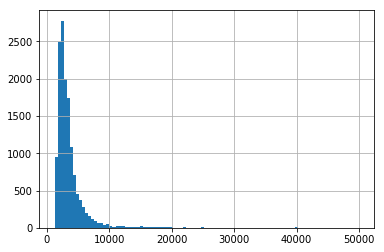

In [6]:
raw_df['rent'].hist(bins=100)

### Seperate all features into continuous, categorical and binary features.

For those none relatived features as below, we have excluded them from the features grouping: 
- addr_unit: no relationship
- building_id: no relationship
- addr_lat: hard to analyze latitude
- addr_lon: hard to analyze longtitude
- bin: need to wait for external dataset
- bbl: need to wait for external dataset
- description: hard to build a NLP model
- unit: no relationship


In [7]:
continuous_features =['bathrooms','bedrooms','size_sqft','floor_count','year_built','min_to_subway','floornumber' ]
caterigal_features =['addr_street','addr_city','addr_zip','neighborhood','borough','line' ]
binary_features = ['has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher','is_furnished', 'has_gym', 'allows_pets', 
                   'has_washer_dryer','has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
                   'has_childrens_playroom', 'no_fee', ]

## Import external dataset from Internal Revenue Service
 - We will import the 2017 individual income Tax statistic dataset from IRS website(https://www.irs.gov/pub/irs-soi/17zpallagi.csv).
 - We will expend a new feature: **average_income** based on zipcode to our raw dataset 

In [8]:
raw_income_data=pd.read_csv('https://www.irs.gov/pub/irs-soi/17zpallagi.csv', index_col=0)
raw_income_data.columns

Index(['STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'ELF',
       'CPREP', 'PREP',
       ...
       'N85300', 'A85300', 'N11901', 'A11901', 'N11900', 'A11900', 'N11902',
       'A11902', 'N12000', 'A12000'],
      dtype='object', length=152)

In [9]:
raw_income_data.describe()

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
count,166537.000000,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,...,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05
mean,48870.221668,3.499883,1.797506e+03,8.568076e+02,6.466075e+02,257.395354,1.595375e+03,109.165711,9.565737e+02,1.115313e+03,...,52.247849,2.652260e+02,366.565508,2.075837e+03,1.385102e+03,4.864975e+03,1.349381e+03,3.932834e+03,43.103875,8.790301e+02
std,27140.457939,1.707903,3.682065e+04,2.157115e+04,1.180901e+04,6579.521856,3.234179e+04,2546.536828,1.996698e+04,2.347348e+04,...,2663.659358,1.535593e+04,6891.242958,6.608186e+04,2.947749e+04,1.012458e+05,2.909491e+04,7.693938e+04,947.324343,4.399491e+04
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,27030.000000,2.000000,7.000000e+01,0.000000e+00,4.000000e+01,0.000000,6.000000e+01,0.000000,4.000000e+01,4.000000e+01,...,0.000000,0.000000e+00,20.000000,2.100000e+01,5.000000e+01,1.580000e+02,4.000000e+01,1.410000e+02,0.000000,0.000000e+00
50%,48876.000000,3.000000,2.500000e+02,7.000000e+01,1.100000e+02,20.000000,2.200000e+02,0.000000,1.500000e+02,1.400000e+02,...,0.000000,0.000000e+00,60.000000,1.550000e+02,1.800000e+02,6.220000e+02,1.700000e+02,5.480000e+02,0.000000,0.000000e+00
75%,70601.000000,5.000000,1.020000e+03,3.400000e+02,3.800000e+02,90.000000,9.100000e+02,60.000000,5.600000e+02,5.900000e+02,...,0.000000,0.000000e+00,220.000000,6.870000e+02,7.400000e+02,2.484000e+03,7.100000e+02,2.207000e+03,30.000000,6.400000e+01
max,99999.000000,6.000000,5.824360e+06,4.130490e+06,1.757700e+06,982390.000000,4.980210e+06,475240.000000,3.387570e+06,3.233490e+06,...,763140.000000,4.031847e+06,890950.000000,1.750126e+07,4.598480e+06,1.667374e+07,4.561540e+06,9.443931e+06,186110.000000,1.056186e+07


### Income Dataset Description 
This dataset comes from the IRS website's 2017 ZIP Code Data (SOI) about Individual Income Tax Statistics.
According to the documentation's overview,the Statistics of Income (SOI) Division’s ZIP code data is tabulated using individual income tax returns (Forms 1040) filed with the Internal Revenue Service (IRS) during the 12-month period, January 1, 2018 to December 31, 2018.
The original dataset contains many income and Tax Items, we only keep the ones that are relevant: 
- STATEFIPS:The State Federal Information Processing System (FIPS) code
- STATE: The State associated with the ZIP code
- ZIPCODE: 5-digit Zip code
- agi_stub: Size of adjusted gross income
- N1: Total number of returns
- A02650: Number of returns with total income

Our goal is to find the average income of each zipcode.

### Clean the raw income data and rename feature

In [10]:
raw_income_data = raw_income_data.loc[raw_income_data['STATE']=='NY']
raw_income_data.rename(columns = {'N1':'total_returns', 'A02650':'total_income'}, inplace = True) 
raw_income_data = raw_income_data[['STATE','zipcode','agi_stub','total_returns', 'total_income']]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']<99999]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']>0]


### Function to calculate the average income by zip code
Each zip code has 6 different sizes of adjusted gross income which means we have 6 different number of total returns and total income for one zip code.
By using the np.where and sum function, we can obtain the sum of income and sum of returns for each zip code. The income of the original dataset was in thousands of dollar so we need to multiply the sum of income by 1000 and then find the average. Since some zip code was not in the original set, we ingore those average that is NaN and only write the meaningful averages to csv file for future use.

- Calculate average income 
- Export to ny_income_2017.csv for storage
- For next time, no need to import the raw_income_dataset again

In [11]:
average_income = pd.DataFrame({'addr_zip':[],'zip_average_income':[]})

def calculate_avg_income():
    global average_income
    for zipcode in range(10001, 14906):
        current_sum=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_income'],0).sum()
        current_returns=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_returns'],0).sum() 
        if(current_returns <=0 or current_sum<=0):
            continue
        avg_income=(current_sum*1000)/current_returns
        new_row={'addr_zip':zipcode,'zip_average_income':avg_income}
        average_income=average_income.append(new_row,ignore_index=True)           
calculate_avg_income()
average_income.head(5)

,addr_zip,zip_average_income
0,10001.0,183859.908735
1,10002.0,59669.401750
2,10003.0,306277.962003
3,10004.0,385265.306122
4,10005.0,391201.520270


 - We realize that the income dataset is missing all income data between zipcode 11239 - 11354, we will take an averge of zipcode income for 11239 and 11354 to replace any zipcode income in between 
 - In our training and testing dataset, only the zipcode income 11249 is missing

In [12]:
print(list(set(raw_df['addr_zip']) - set(average_income['addr_zip'])))
print(list(set(raw_test_df['addr_zip']) - set(average_income['addr_zip'])))

[11249]
[11249]


**Insert a new row for zipcode income 11249 into the average_income dataframe**

In [13]:
avg_income = (average_income.loc[(average_income['addr_zip']==11239)].iloc[0]['zip_average_income'] +
             average_income.loc[(average_income['addr_zip']==11354)].iloc[0]['zip_average_income'])/2
new_row = {'addr_zip':11249,'zip_average_income':avg_income}
average_income=average_income.append(new_row,ignore_index=True)  

### Merge the raw train  dataset with the income dataset by addr_zip

In [14]:
raw_test2_df=raw_test_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')
raw_df=raw_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')

### Find zip_average_income and rent cooleration

In [15]:
continuous_features.append('zip_average_income')

In [16]:
continuous_df = raw_df[['zip_average_income','rent']]
continuous_df.corr()['rent'][:-1]


zip_average_income    0.393228
Name: rent, dtype: float64

**The correlation between zip_average_income and rent is 0.393228, it is good enough to consider as a important feature that might impact the rent**

# Data Cleaning


### Handling missing data
In order to handle missing data in this dataset, we frist find and count all the null values.

In [17]:
raw_df.isna().sum()

addr_unit                  110
building_id                  0
bedrooms                     0
bathrooms                    0
size_sqft                    0
created_at                   0
addr_street                  0
addr_city                    0
addr_zip                     0
addr_lat                     0
addr_lon                     0
bin                          1
bbl                          0
floor_count                  0
year_built                 470
min_to_subway              143
has_doorman                  0
has_elevator                 0
has_fireplace                0
has_dishwasher               0
is_furnished                 0
has_gym                      0
allows_pets                  0
has_washer_dryer             0
has_garage                   0
has_roofdeck                 0
has_concierge                0
has_pool                     0
has_garden                   0
has_childrens_playroom       0
rent                         0
no_fee                       0
descript

As we can see from the result,there are missing data appearing on: 
- addr_unit
- bin 
- year_built 
- min_to_subway 
- description 
- neighborhood 
- unit 
- floornumber 
- line 

Continuous features floornumber, year_built and min_to_subway has impact on the rent, so we will fill with mode or mean. For catagorigious feature neighborhood, we will not use it in building model, because it has too many possible values.

In [24]:
md_df = raw_df

md_df['floornumber'].fillna(md_df['floornumber'].mode()[0], inplace=True)
raw_test2_df['floornumber'].fillna(raw_test2_df['floornumber'].mode()[0], inplace=True)

md_df['min_to_subway'].fillna(md_df['min_to_subway'].mean(), inplace=True)
raw_test2_df['min_to_subway'].fillna(raw_test2_df['min_to_subway'].mean(), inplace=True)

md_df['year_built'].fillna(md_df['year_built'].mean(), inplace=True)
raw_test2_df['year_built'].fillna(raw_test2_df['year_built'].mean(), inplace=True)

print("original shape of dataset:",raw_df.shape)
print("shape of dataset after handling missing data, should stay the same:",md_df.shape)

original shape of dataset: (14000, 39)
shape of dataset after handling missing data, should stay the same: (14000, 39)


## Remove outliers

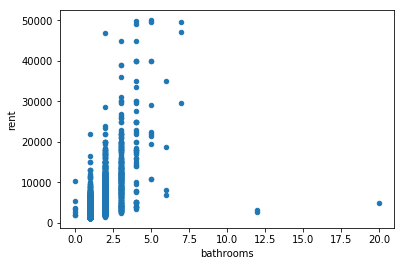

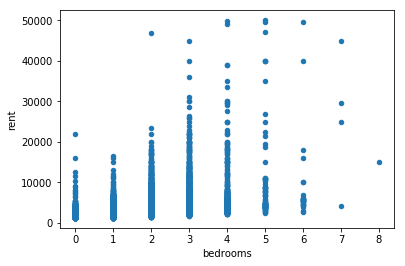

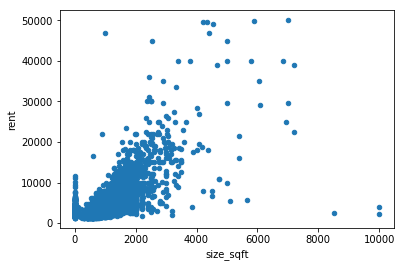

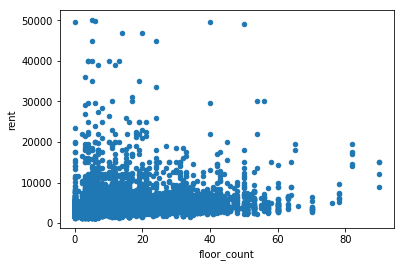

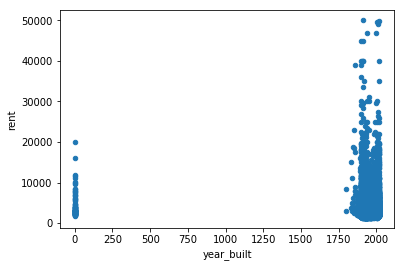

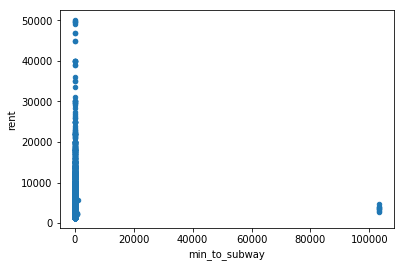

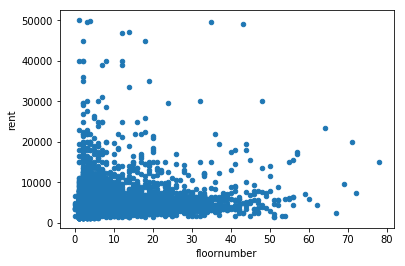

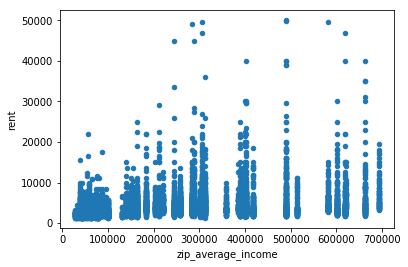

In [25]:
for feature in continuous_features:
    md_df.plot.scatter(feature, 'rent')

In [26]:
md_df[md_df['rent']>40000].count()

addr_unit                 9
building_id               9
bedrooms                  9
bathrooms                 9
size_sqft                 9
created_at                9
addr_street               9
addr_city                 9
addr_zip                  9
addr_lat                  9
addr_lon                  9
bin                       9
bbl                       9
floor_count               9
year_built                9
min_to_subway             9
has_doorman               9
has_elevator              9
has_fireplace             9
has_dishwasher            9
is_furnished              9
has_gym                   9
allows_pets               9
has_washer_dryer          9
has_garage                9
has_roofdeck              9
has_concierge             9
has_pool                  9
has_garden                9
has_childrens_playroom    9
rent                      9
no_fee                    9
description               9
neighborhood              9
borough                   9
unit                

**drop size_sqrt = 0 for now, since there are 713 rows, might replace with mode when creating models**

In [27]:
def remove_outliers(md_df, feature, low_value, high_value):
    print(feature, ': ', md_df.shape)
    md_df = md_df[md_df[feature]>low_value]
    md_df = md_df[md_df[feature]<=high_value]
    md_df.reset_index(drop=True,inplace=True)
    print(feature, ': ', md_df.shape)
    return md_df

md_df = remove_outliers(md_df, 'rent', 0, 40000)
md_df = remove_outliers(md_df, 'bathrooms', 0, 12)
md_df = remove_outliers(md_df, 'size_sqft', 0, 10000)
md_df = remove_outliers(md_df, 'year_built', 1700, 2019)
md_df = remove_outliers(md_df, 'min_to_subway', 0, 60)
md_df = remove_outliers(md_df, 'floornumber', 0, 60)

md_df['year_built'] = 2019 - md_df['year_built'].astype(int)

rent :  (14000, 39)
rent :  (13991, 39)
bathrooms :  (13991, 39)
bathrooms :  (13983, 39)
size_sqft :  (13983, 39)
size_sqft :  (12971, 39)
year_built :  (12971, 39)
year_built :  (12892, 39)
min_to_subway :  (12892, 39)
min_to_subway :  (12753, 39)
floornumber :  (12753, 39)
floornumber :  (12736, 39)


### Encode categorical feature and drop useless features

In [28]:
boroughs = np.array(md_df['borough'].unique())

for borough in boroughs:
    md_df[borough] = md_df['borough'].apply(lambda x : int(x == borough))
    raw_test2_df[borough] = raw_test2_df['borough'].apply(lambda x : int(x == borough))

features_notNeed = ['addr_unit', 'building_id', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'bin', 'bbl', 'description', \
                    'neighborhood', 'unit', 'borough', 'line']

md_df = md_df.drop(features_notNeed, axis=1)

### Use pair coorelation for continuous features

In [29]:
continuous_df = md_df[continuous_features+['rent']]
continuous_df.corr()['rent'][:-1]

bathrooms             0.636554
bedrooms              0.349936
size_sqft             0.690211
floor_count           0.262856
year_built           -0.108060
min_to_subway        -0.082684
floornumber           0.246969
zip_average_income    0.420397
Name: rent, dtype: float64

### Check coorelation for binary features

In [30]:
md_df[binary_features+['rent']].corr()['rent'][:-1]
coor_results= []

for feature in binary_features:
  df = raw_df.groupby([feature]).aggregate(['mean'])['rent']
  df[feature]= df.index
  coor_results.append(df.corr().iloc[0][1])
coor_df = pd.DataFrame({'Coorelation': coor_results,'Feature':binary_features})
coor_df


,Coorelation,Feature
0,1.0,has_doorman
1,1.0,has_elevator
2,1.0,has_fireplace
3,1.0,has_dishwasher
4,1.0,is_furnished
5,1.0,has_gym
6,1.0,allows_pets
7,1.0,has_washer_dryer
8,1.0,has_garage
9,1.0,has_roofdeck


As we can see in the correlation table, all binrary features highly affected the rents. When we build the models, we should include all binary features.

# Build Models
 - We will be using cross validation to evaluate the performances of our all modles,and then deciding which should be the most suitable one, thus we will first create a function called get_cv_results to obtain the cv_performance.
 - we will try 5 different basic categorical models:`multiple regression, decision tree, random froest, Gradient Boosting Regression and Neural Network`

In [33]:
md_df = shuffle(md_df).reset_index(drop=True)


In [34]:
features = list(md_df.columns)
features.remove('rent')
k_fold = KFold(n_splits=10)

In [35]:
def get_cv_results(regressor):
    
    results = []
    for train, test in k_fold.split(md_df):
        regressor.fit(md_df.loc[train, features], md_df.loc[train, 'rent'])
        y_predicted = regressor.predict(md_df.loc[test, features])
        accuracy = mean_squared_error(md_df.loc[test, 'rent'], y_predicted)**0.5
        results.append(accuracy)

    return np.mean(results), np.std(results)

### Radnom Forest Model

In [36]:
rforest = RandomForestRegressor(
    random_state=11, 
    max_depth=10,
    n_estimators=200
)


In [37]:
get_cv_results(rforest)

(999.803790734472, 133.18585622224026)

In [38]:
rforest.fit(md_df[features], md_df['rent'])  
for feature,score in sorted(zip(features,rforest.feature_importances_), key=lambda x:x[1], reverse=True):
    print(feature, ' ', score)

size_sqft   0.542895968499632
zip_average_income   0.20261456133356512
bathrooms   0.11322851891757318
addr_lon   0.024530475219147238
addr_lat   0.01917323901993333
year_built   0.016309688773539003
bedrooms   0.013919867704758141
floor_count   0.010055956572432578
floornumber   0.0100146384270994
min_to_subway   0.009783796296859147
has_gym   0.005730184364868082
has_roofdeck   0.004453112084932278
has_washer_dryer   0.0033956114770440503
has_dishwasher   0.003326554815642287
Manhattan   0.0029439736587438927
no_fee   0.0028152109102832275
has_elevator   0.0023133105065078433
is_furnished   0.002165835070262366
has_garden   0.001977536440076607
has_concierge   0.0017792194059654892
allows_pets   0.0013352550924121726
has_doorman   0.0013229291003806051
has_pool   0.0012154875516828677
has_fireplace   0.000939070495602523
has_childrens_playroom   0.0008897522352754167
has_garage   0.0005431085349996884
Brooklyn   0.00030203811823895885
Queens   1.661802262039333e-05
Bronx   7.34688582

### Multiple Regression
 - Multiple regression is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables
 

In [ ]:
mul_reg_features = features[:]
x = md_df[features] 
y = md_df['rent']
est = sm.OLS(y, x).fit()
est.summary()

In [ ]:
mul_reg_features.remove('has_garden')
mul_reg_features.remove('year_built')
mul_reg_features.remove('bedrooms')

In [ ]:
mul_reg = LinearRegression().fit(md_df[mul_reg_features], md_df['rent'])
get_cv_results(mul_reg)

## Gradient Boosting Regression
For the gradient boosting regressor we will first set up the hyperparameter max_depth=5 to avoid overfitting, will adjust more hyperparameter as we move on to improve the model


In [ ]:
gbrdemo = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=100
)

get_cv_results(gbrdemo)

### Tuning Hyperparameters
Now let's use GridSearchCV form sci-kit learn model_selection to tune the hyperparameters, and find the most suitable one for our Gradient Boosting Regression model.

In [ ]:
# Tuning the hyperparameters based on a cross-validation subset (cv)
# cited link: link: https://shankarmsy.github.io/stories/gbrt-sklearn.html

def GradientBooster():
    
    param_grid={'n_estimators':[100],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth':[4, 5, 6],
            'min_samples_leaf':[3, 5, 9],
           }
    
    # choose cross validation generator and use ShuffleSplit which randomly shuffles and selects Train and CV sets
    cv = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
    
    classifier = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=param_grid, n_jobs=4, cv=cv)
    
    classifier.fit(md_df[features], md_df['rent'])  
    return classifier.best_params_

In [ ]:
# Since this function takes too long to run, it will waste a lot of time during development,
# so we will just record the result for further usage. -----Runmin 11/18/19
"""
best_est=GradientBooster()

print("Best Estimator Parameters:")
print("n_estimators: ",best_est['n_estimators'])
print("max_depth: ", best_est['max_depth'])
print("Learning Rate: ", best_est['learning_rate'])
print("min_samples_leaf: ", best_est['min_samples_leaf'])
"""
print("Since this function takes too long to run, it will waste a lot of time during development,\
      \nso we will just record the result for further usage:")
print("\nBest Estimator Parameters:")
print("n_estimators: ",100)
print("max_depth: ", 6)
print("Learning Rate: ", 0.1)
print("min_samples_leaf: ", 3)

As we can see from the result above, we have found the suitable hyperparameters for our model, thus we can use them to check if a better result will be obtained.


In [ ]:
bettergbr1 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    min_samples_leaf=3
)

get_cv_results(bettergbr1)

We do see some improvements on the mean squared error after we adjusted the hyperparameter a bit

### Neural Network

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(md_df[features])
Y = md_df['rent'].values.reshape(-1,1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
net = models.Sequential()
net.add(layers.Dense(64, input_dim=train_x.shape[1], kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(128, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(1, activation='linear'))

net.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

In [ ]:
net.fit(train_x, train_y, epochs=150, batch_size=64, validation_split = 0.1)

In [ ]:
mean_squared_error(test_y, net.predict(test_x))

**Although the DL Neural Network seems to provide a better result on mean squared errors but it is really unstable** 

we have ran few test run on it, and each time it gives different results range from 853411.6171418771 to around 1,300,000.
Therefore, we might still choose Gradient Boosting Regression as the most suitable model, since it provides a overall better result.